# Context

Mobil99 adalah startup dealer mobil bekas yang beroperasi di Arab Saudi. Permasalahan utama yang ingin diselesaikan adalah bagaimana menentukan estimasi harga mobil bekas secara cepat, akurat, dan sesuai dengan kondisi pasar Saudi.

Proses Bisnis Mobil99
Pembelian: Mobil99 mengakuisisi mobil bekas dari masyarakat. 
Rekondisi: Setiap mobil yang dibeli melalui proses pengecekan menyeluruh, perbaikan, servis, dan pemeliharaan untuk memastikan kualitasnya. 
Penjualan: Mobil yang telah direkondisi dijual kepada konsumen.

Permasalahan utama yang ingin diselesaikan ada di tahap penentuan harga jual mobil bekas setelah direkondisi untuk dijual kepada konsumen. Dikarenakan keterbatasan SDM, melihat cukup banyak variabel yang menentukan harga mobil bekas, diperlukan sebuah algoritma yang dapat mengestimasi harga mobil dengan instan dengan mempertimbangkan resiko over/under pricing, dan juga data historis lokal. Dengan dataset yang berisi mobil - mobil bekas di Arab Saudi (diambil dari Syarah.com), diharapkan dapat membuat algoritma machine learning yang dapat mengestimasikan harga mobil yang pantas sehingga Mobil99 tidak mengalami kerugian dan memiliki nilai tambah dari segi nilai harga yang terpercaya sehingga dapat meningkatkan penjualan.

# Data Understanding

Dataset ini berisi 8034 record used cars yang didapatkan dari syarah.com, sebuah website jual beli mobil dari Arab Saudi. Setiap baris merepresentasikan used car dengan informasi sebagai berikut : 

- Make: Nama pabrikan
- Type: Tipe mobil
- Year: Tahun produksi
- Origin: Asal mobil
- Color : Warna mobil
- Options: Pilihan paket fitur mobil
- Engine_Size: Kapasitas mesin
- Fuel_Type : Tipe bahan bakar
- Gear_Type: Tipe transmisi mobil
- Mileage: Jumlah jarak yang sudah ditempuh mobil
- Region: Negara dimana mobil dijual
- Price: Harga mobil
- Negotiable: Keterangan harga dapat dinegosiasi atau tidak.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [2]:
df=pd.read_csv("UsedCarsSA_Clean_EN.csv")
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,Audi,A6,2015,Saudi,Silver,Full,3.0,Gas,Automatic,77000,Riyadh,75000,False
8031,Chevrolet,Camaro,2010,Saudi,Silver,Full,3.6,Gas,Automatic,150000,Riyadh,53000,False
8032,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,4.6,Gas,Automatic,260,Najran,0,True
8033,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000,False


In [13]:
# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (8035, 13)

Column Names:
['Make', 'Type', 'Year', 'Origin', 'Color', 'Options', 'Engine_Size', 'Fuel_Type', 'Gear_Type', 'Mileage', 'Region', 'Price', 'Negotiable']

Data Types:
Make            object
Type            object
Year             int64
Origin          object
Color           object
Options         object
Engine_Size    float64
Fuel_Type       object
Gear_Type       object
Mileage          int64
Region          object
Price            int64
Negotiable        bool
dtype: object

Missing Values:
Make           0
Type           0
Year           0
Origin         0
Color          0
Options        0
Engine_Size    0
Fuel_Type      0
Gear_Type      0
Mileage        0
Region         0
Price          0
Negotiable     0
dtype: int64


Tidak ada missing value pada dataset

In [14]:
# Select numerical columns
numerical_cols = ['Year', 'Engine_Size', 'Mileage', 'Price']
categorical_cols = ['Make', 'Type', 'Origin', 'Color', 'Options', 'Fuel_Type', 'Gear_Type', 'Region', 'Negotiable']

print("Numerical Variables Summary:")
print(df[numerical_cols].describe())

Numerical Variables Summary:
              Year  Engine_Size       Mileage         Price
count  8035.000000  8035.000000  8.035000e+03  8.035000e+03
mean   2014.097698     3.287729  1.491488e+05  5.369984e+04
std       5.757228     1.517747  3.474480e+05  7.198472e+04
min    1963.000000     1.000000  1.000000e+02  0.000000e+00
25%    2012.000000     2.000000  3.700000e+04  0.000000e+00
50%    2016.000000     3.000000  1.019600e+05  3.700000e+04
75%    2018.000000     4.400000  1.950000e+05  7.375000e+04
max    2022.000000     9.000000  2.000000e+07  1.150000e+06


Terdapat data anomali dengan value 0 pada kolom price

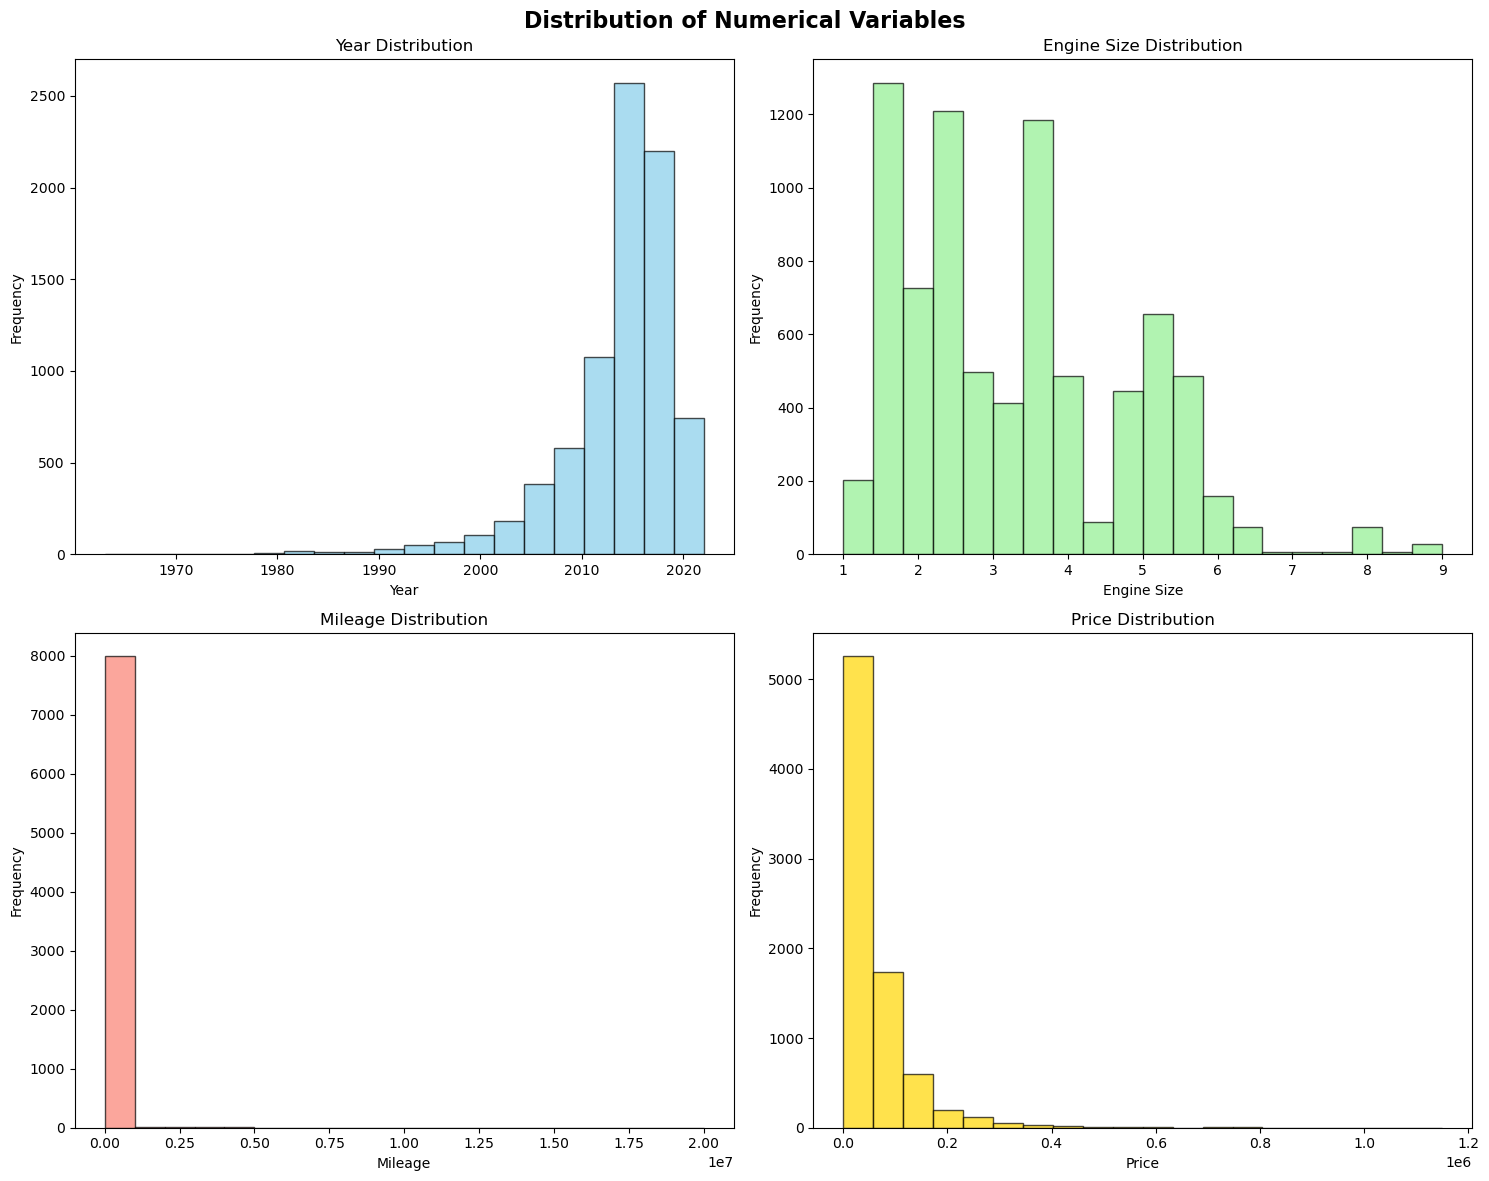

In [15]:
# Create subplots for numerical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Numerical Variables', fontsize=16, fontweight='bold')

# Year distribution
axes[0,0].hist(df['Year'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Year Distribution')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Frequency')

# Engine Size distribution
axes[0,1].hist(df['Engine_Size'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Engine Size Distribution')
axes[0,1].set_xlabel('Engine Size')
axes[0,1].set_ylabel('Frequency')

# Mileage distribution
axes[1,0].hist(df['Mileage'], bins=20, alpha=0.7, color='salmon', edgecolor='black')
axes[1,0].set_title('Mileage Distribution')
axes[1,0].set_xlabel('Mileage')
axes[1,0].set_ylabel('Frequency')

# Price distribution
axes[1,1].hist(df['Price'], bins=20, alpha=0.7, color='gold', edgecolor='black')
axes[1,1].set_title('Price Distribution')
axes[1,1].set_xlabel('Price')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Distribusi data semua kolom numerical berdistribusi tidak normal. Analisis yang akan dilakukan kedepannya akan banyak menggunakan nilai median sebagai rata-rata melihat distribusi data yang ada.

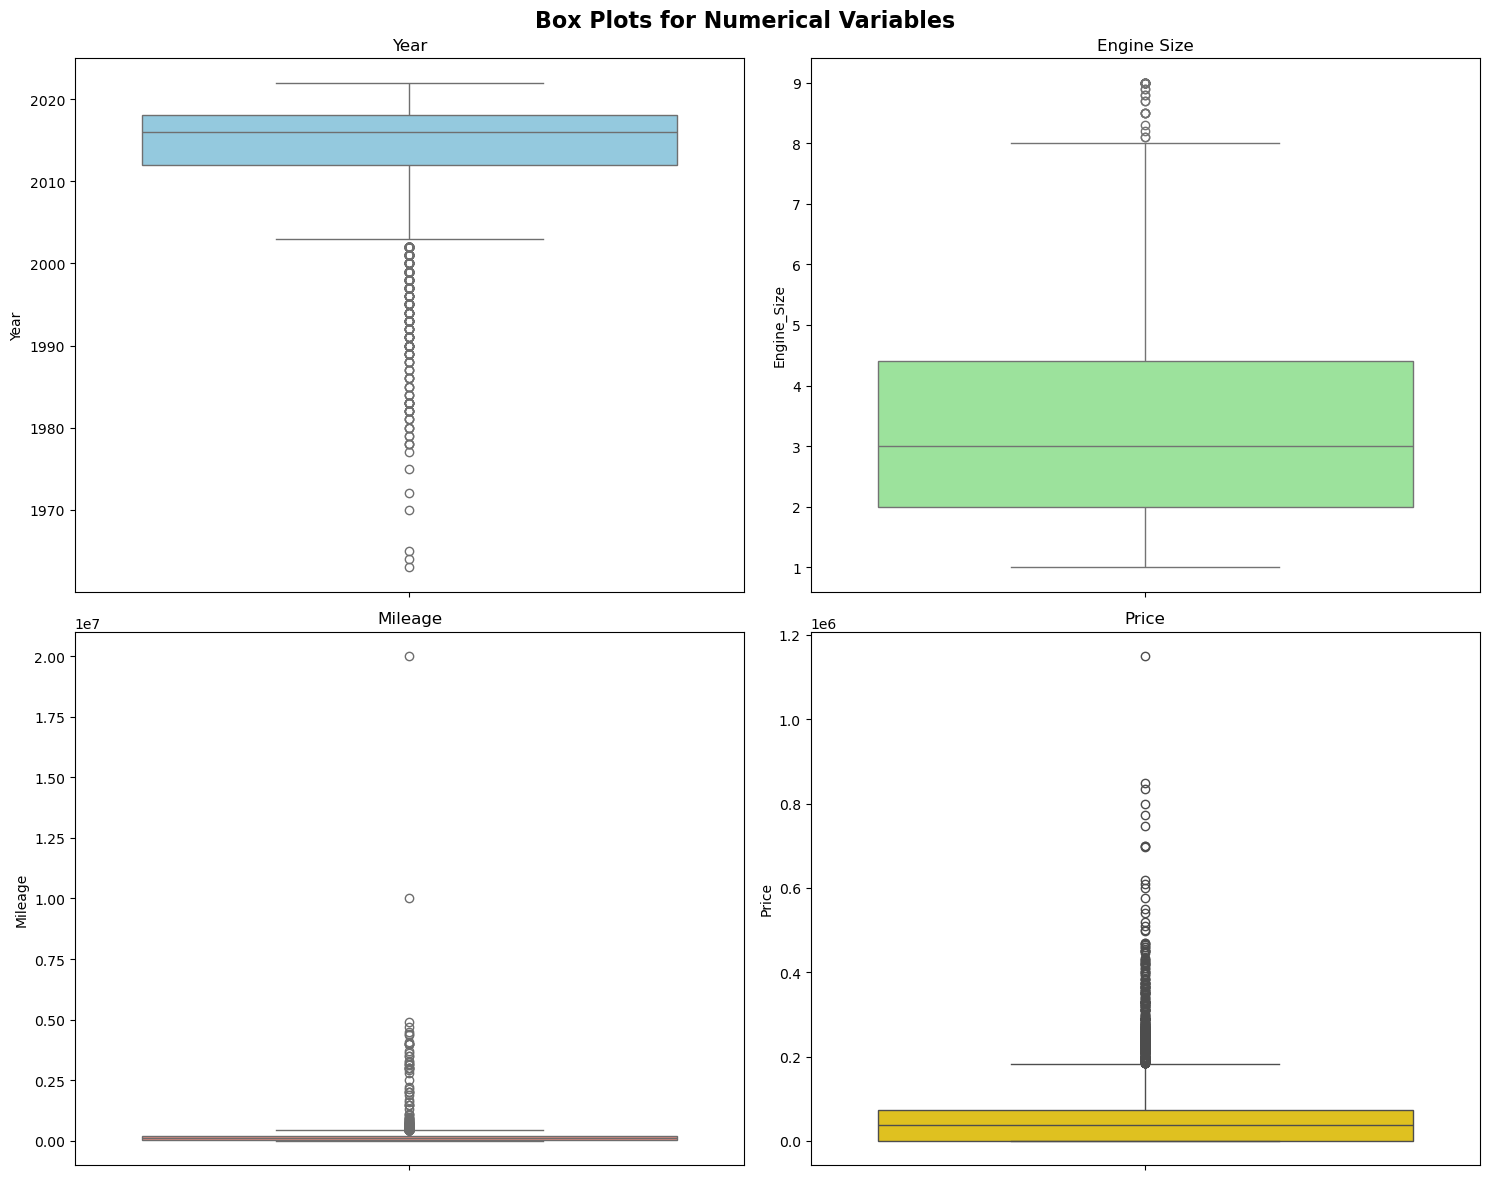

In [18]:
# Box plots to identify outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Box Plots for Numerical Variables', fontsize=16, fontweight='bold')

sns.boxplot(y=df['Year'], ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Year')

sns.boxplot(y=df['Engine_Size'], ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Engine Size')

sns.boxplot(y=df['Mileage'], ax=axes[1,0], color='salmon')
axes[1,0].set_title('Mileage')

sns.boxplot(y=df['Price'], ax=axes[1,1], color='gold')
axes[1,1].set_title('Price')

plt.tight_layout()
plt.show()

Outliers pada data, sementara tetap digunakan didalam analisis karena masih dikategorikan tidak anomali.

In [24]:
# Generate comprehensive summary
print("="*50)
print("COMPREHENSIVE DATA DISTRIBUTION SUMMARY")
print("="*50)

print(f"\nDataset Overview:")
print(f"Total records: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"Numerical columns: {len(numerical_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")

print(f"\nMissing Values Summary:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_summary[missing_summary['Missing Count'] > 0])

print(f"\nKey Insights from Distribution:")
for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  Range: {df[col].min()} - {df[col].max()}")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Standard Deviation: {df[col].std():.2f}")

COMPREHENSIVE DATA DISTRIBUTION SUMMARY

Dataset Overview:
Total records: 8035
Total columns: 13
Numerical columns: 4
Categorical columns: 9

Missing Values Summary:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []

Key Insights from Distribution:

Year:
  Range: 1963 - 2022
  Mean: 2014.10
  Median: 2016.00
  Standard Deviation: 5.76

Engine_Size:
  Range: 1.0 - 9.0
  Mean: 3.29
  Median: 3.00
  Standard Deviation: 1.52

Mileage:
  Range: 100 - 20000000
  Mean: 149148.80
  Median: 101960.00
  Standard Deviation: 347448.02

Price:
  Range: 0 - 1150000
  Mean: 53699.84
  Median: 37000.00
  Standard Deviation: 71984.72


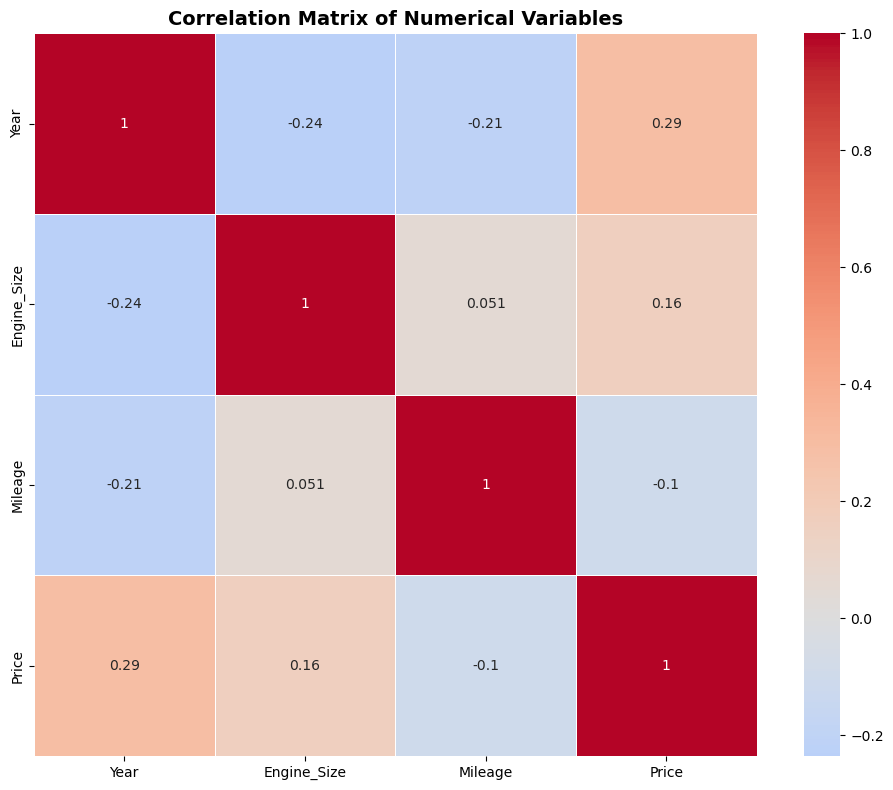

Correlation Matrix:
                 Year  Engine_Size   Mileage     Price
Year         1.000000    -0.236104 -0.214517  0.292716
Engine_Size -0.236104     1.000000  0.050568  0.155816
Mileage     -0.214517     0.050568  1.000000 -0.102925
Price        0.292716     0.155816 -0.102925  1.000000


In [21]:
# Correlation matrix for numerical variables
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlation Matrix:")
print(correlation_matrix)

Terhadap kolom target (Price), features Year dan Engine_Size berkorelasi positif sementara dengan feature Mileage berkorelasi negatif. Korelasi antar feature Mileage dan Engine_Size cukup kuat.

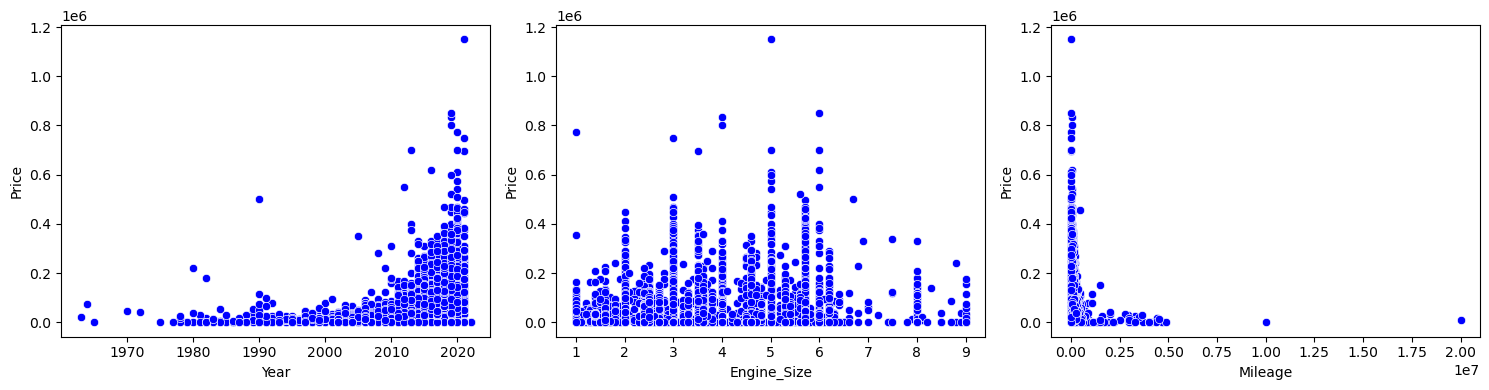

In [44]:
numeric_features=['Year','Engine_Size','Mileage']
fig = plt.figure(figsize=(15, 4))

for i in range(0, len(numeric_features)):
    if numeric_features[i] != 'Price':
        ax = plt.subplot(1, 3, i+1)
        sns.scatterplot(data= df ,y='Price', x=numeric_features[i], color='b')
        plt.tight_layout()

Identifikasi pengaruh data Year, Engine_Size, dan Mileage terhadap Price :
- Usia mobil yang lebih muda cenderung memiliki harga yang lebih tinggi
- Used car dengan jumlah jarak (mileage) yang lebih sedikit cenderung memiliki harga yang lebih tinggi
- Engine_Size tidak terlalu berpengaruh terhadap harga

Untuk melihat pengaruh features terhadap harga dilakukan test statistic.

In [68]:
from scipy import stats
from scipy.stats import f_oneway, pearsonr, spearmanr, ttest_ind

# Significance level
ALPHA = 0.05

def interpret_pvalue(p_value, alpha=ALPHA):
    return "SIGNIFICANT" if p_value < alpha else "NOT SIGNIFICANT"

# Create results storage
results = []

In [69]:
# Year vs Price - Pearson Correlation
print("\n1. YEAR vs PRICE")
print("   Test: Pearson Correlation")
corr, p_value = pearsonr(df['Year'].dropna(), df['Price'].dropna())
results.append(('Year', 'Pearson Correlation', corr, p_value, interpret_pvalue(p_value)))
print(f"   Correlation: {corr:.4f}, P-value: {p_value:.6f} → {interpret_pvalue(p_value)}")

# Engine_Size vs Price - Pearson Correlation  
print("\n2. ENGINE SIZE vs PRICE")
print("   Test: Pearson Correlation")
corr, p_value = pearsonr(df['Engine_Size'].dropna(), df['Price'].dropna())
results.append(('Engine_Size', 'Pearson Correlation', corr, p_value, interpret_pvalue(p_value)))
print(f"   Correlation: {corr:.4f}, P-value: {p_value:.6f} → {interpret_pvalue(p_value)}")

# Mileage vs Price - Spearman Correlation
print("\n3. MILEAGE vs PRICE")
print("   Test: Spearman Correlation")
corr, p_value = spearmanr(df['Mileage'].dropna(), df['Price'].dropna())
results.append(('Mileage', 'Spearman Correlation', corr, p_value, interpret_pvalue(p_value)))
print(f"   Correlation: {corr:.4f}, P-value: {p_value:.6f} → {interpret_pvalue(p_value)}")


1. YEAR vs PRICE
   Test: Pearson Correlation
   Correlation: 0.2927, P-value: 0.000000 → SIGNIFICANT

2. ENGINE SIZE vs PRICE
   Test: Pearson Correlation
   Correlation: 0.1558, P-value: 0.000000 → SIGNIFICANT

3. MILEAGE vs PRICE
   Test: Spearman Correlation
   Correlation: -0.1222, P-value: 0.000000 → SIGNIFICANT


In [70]:
# Make vs Price - ANOVA
print("\n4. MAKE vs PRICE")
print("   Test: One-Way ANOVA")
make_groups = [group['Price'].values for name, group in df.groupby('Make') if len(group) > 1]
if len(make_groups) >= 2:
    f_stat, p_value = f_oneway(*make_groups)
    results.append(('Make', 'ANOVA', f_stat, p_value, interpret_pvalue(p_value)))
    print(f"   F-statistic: {f_stat:.4f}, P-value: {p_value:.6f} → {interpret_pvalue(p_value)}")

# Type vs Price - ANOVA
print("\n5. TYPE vs PRICE")
print("   Test: One-Way ANOVA")
type_groups = [group['Price'].values for name, group in df.groupby('Type') if len(group) > 1]
if len(type_groups) >= 2:
    f_stat, p_value = f_oneway(*type_groups)
    results.append(('Type', 'ANOVA', f_stat, p_value, interpret_pvalue(p_value)))
    print(f"   F-statistic: {f_stat:.4f}, P-value: {p_value:.6f} → {interpret_pvalue(p_value)}")

# Origin vs Price - ANOVA
print("\n6. ORIGIN vs PRICE")
print("   Test: One-Way ANOVA")
origin_groups = [group['Price'].values for name, group in df.groupby('Origin') if len(group) > 1]
if len(origin_groups) >= 2:
    f_stat, p_value = f_oneway(*origin_groups)
    results.append(('Origin', 'ANOVA', f_stat, p_value, interpret_pvalue(p_value)))
    print(f"   F-statistic: {f_stat:.4f}, P-value: {p_value:.6f} → {interpret_pvalue(p_value)}")

# Fuel_Type vs Price - ANOVA
print("\n7. FUEL TYPE vs PRICE")
print("   Test: One-Way ANOVA")
fuel_groups = [group['Price'].values for name, group in df.groupby('Fuel_Type') if len(group) > 1]
if len(fuel_groups) >= 2:
    f_stat, p_value = f_oneway(*fuel_groups)
    results.append(('Fuel_Type', 'ANOVA', f_stat, p_value, interpret_pvalue(p_value)))
    print(f"   F-statistic: {f_stat:.4f}, P-value: {p_value:.6f} → {interpret_pvalue(p_value)}")

# Region vs Price - ANOVA
print("\n8. REGION vs PRICE")
print("   Test: One-Way ANOVA")
region_groups = [group['Price'].values for name, group in df.groupby('Region') if len(group) > 1]
if len(region_groups) >= 2:
    f_stat, p_value = f_oneway(*region_groups)
    results.append(('Region', 'ANOVA', f_stat, p_value, interpret_pvalue(p_value)))
    print(f"   F-statistic: {f_stat:.4f}, P-value: {p_value:.6f} → {interpret_pvalue(p_value)}")


4. MAKE vs PRICE
   Test: One-Way ANOVA
   F-statistic: 43.5928, P-value: 0.000000 → SIGNIFICANT

5. TYPE vs PRICE
   Test: One-Way ANOVA
   F-statistic: 11.1542, P-value: 0.000000 → SIGNIFICANT

6. ORIGIN vs PRICE
   Test: One-Way ANOVA
   F-statistic: 56.3167, P-value: 0.000000 → SIGNIFICANT

7. FUEL TYPE vs PRICE
   Test: One-Way ANOVA
   F-statistic: 0.8122, P-value: 0.443939 → NOT SIGNIFICANT

8. REGION vs PRICE
   Test: One-Way ANOVA
   F-statistic: 14.2400, P-value: 0.000000 → SIGNIFICANT


In [71]:
# Gear_Type vs Price - T-test
print("\n9. GEAR TYPE vs PRICE")
print("   Test: Independent T-test")
gear_categories = df['Gear_Type'].dropna().unique()
if len(gear_categories) == 2:
    group1 = df[df['Gear_Type'] == gear_categories[0]]['Price'].dropna()
    group2 = df[df['Gear_Type'] == gear_categories[1]]['Price'].dropna()
    t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
    results.append(('Gear_Type', 'T-test', t_stat, p_value, interpret_pvalue(p_value)))
    print(f"   T-statistic: {t_stat:.4f}, P-value: {p_value:.6f} → {interpret_pvalue(p_value)}")
else:
    print(f"   Gear_Type has {len(gear_categories)} categories, expected 2")
    results.append(('Gear_Type', 'T-test', 0, 1.0, 'NOT SIGNIFICANT'))

# Negotiable vs Price - T-test
print("\n10. NEGOTIABLE vs PRICE")
print("    Test: Independent T-test")
negotiable_categories = df['Negotiable'].dropna().unique()
if len(negotiable_categories) == 2:
    group1 = df[df['Negotiable'] == negotiable_categories[0]]['Price'].dropna()
    group2 = df[df['Negotiable'] == negotiable_categories[1]]['Price'].dropna()
    t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
    results.append(('Negotiable', 'T-test', t_stat, p_value, interpret_pvalue(p_value)))
    print(f"    T-statistic: {t_stat:.4f}, P-value: {p_value:.6f} → {interpret_pvalue(p_value)}")
else:
    print(f"    Negotiable has {len(negotiable_categories)} categories, expected 2")
    results.append(('Negotiable', 'T-test', 0, 1.0, 'NOT SIGNIFICANT'))


9. GEAR TYPE vs PRICE
   Test: Independent T-test
   T-statistic: 19.6770, P-value: 0.000000 → SIGNIFICANT

10. NEGOTIABLE vs PRICE
    Test: Independent T-test
    T-statistic: 77.4806, P-value: 0.000000 → SIGNIFICANT


In [72]:
# Color vs Price - ANOVA
print("\n11. COLOR vs PRICE")
print("    Test: One-Way ANOVA")
top_colors = df['Color'].value_counts().head(10).index
df_top_colors = df[df['Color'].isin(top_colors)]
color_groups = [group['Price'].values for name, group in df_top_colors.groupby('Color') if len(group) > 1]
if len(color_groups) >= 2:
    f_stat, p_value = f_oneway(*color_groups)
    results.append(('Color', 'ANOVA (Top 10)', f_stat, p_value, interpret_pvalue(p_value)))
    print(f"    F-statistic: {f_stat:.4f}, P-value: {p_value:.6f} → {interpret_pvalue(p_value)}")
else:
    print("    Insufficient data for ANOVA")
    results.append(('Color', 'ANOVA', 0, 1.0, 'NOT SIGNIFICANT'))

# Options vs Price - ANOVA (Approach 2 that worked)
print("\n12. OPTIONS vs PRICE")
print("    Test: One-Way ANOVA (Top Options Categories)")
top_options = df['Options'].value_counts().head(8).index
df_filtered = df[df['Options'].isin(top_options)]
option_groups = [group['Price'].values for name, group in df_filtered.groupby('Options')]

if len(option_groups) >= 2:
    f_stat, p_value = f_oneway(*option_groups)
    results.append(('Options', 'ANOVA', f_stat, p_value, interpret_pvalue(p_value)))
    print(f"    F-statistic: {f_stat:.4f}, P-value: {p_value:.6f} → {interpret_pvalue(p_value)}")
else:
    results.append(('Options', 'ANOVA', 0, 1.0, 'NOT SIGNIFICANT'))
    print("    Insufficient data for ANOVA")


11. COLOR vs PRICE
    Test: One-Way ANOVA
    F-statistic: 13.0612, P-value: 0.000000 → SIGNIFICANT

12. OPTIONS vs PRICE
    Test: One-Way ANOVA (Top Options Categories)
    F-statistic: 189.5925, P-value: 0.000000 → SIGNIFICANT


Berdasarkan statistical test hanya feature Fuel_Type yang tidak berpengaruh secara signifikan terhadap Price

In [27]:
# Analyze categorical variables
print("Categorical Variables Analysis:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"Number of unique values: {df[col].nunique()}")

Categorical Variables Analysis:

Make:
Number of unique values: 59

Type:
Number of unique values: 381

Origin:
Number of unique values: 4

Color:
Number of unique values: 15

Options:
Number of unique values: 3

Fuel_Type:
Number of unique values: 3

Gear_Type:
Number of unique values: 2

Region:
Number of unique values: 27

Negotiable:
Number of unique values: 2


# Data Preprocessing

In [3]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

<div class="alert alert-info">

Data duplikat dihilangkan

In [4]:
df=df[df.Price>0]

<div class="alert alert-info">

Deskripsi data menunjukkan kolom target (price) terdapat nilai 0. Hal ini terjadi karena harga dapat dinegosiasi. Data dengan value 0 didrop agar analisis dan pemodelan machine learning dapat lebih akurat

In [5]:
df.drop(columns='Negotiable',inplace=True)

<div class="alert alert-info">

Feature Negotiable didrop karena hanya tersisa 1 value (False) setelah kolom Price dengan value 0 didrop sehingga kolom Negotiable tidak akan berpengaruh sama sekali terhadap model machine learning.

In [77]:
df_clean=df.copy()

# Check the most expensive cars - are they legitimate?
print("=== TOP 10 MOST EXPENSIVE CARS ===")
top_expensive = df_clean.nlargest(10, 'Price')[['Make', 'Year', 'Type', 'Price', 'Fuel_Type']]
print(top_expensive)

# Check the cheapest cars - are they errors?
print("\n=== TOP 10 CHEAPEST CARS ===")
top_cheap = df_clean.nsmallest(10, 'Price')[['Make', 'Year', 'Type', 'Price', 'Fuel_Type']]
print(top_cheap)

=== TOP 10 MOST EXPENSIVE CARS ===
             Make  Year         Type    Price Fuel_Type
1022     Mercedes  2021            G  1150000       Gas
5913      Bentley  2019     Bentayga   850000       Gas
3826     Mercedes  2019            G   835000       Gas
4038     Mercedes  2019            G   800000       Gas
3182      Bentley  2020       Arnage   772500       Gas
3399     Mercedes  2021            S   748000       Gas
4508   Land Rover  2020  Range Rover   700000       Gas
6359  Rolls-Royce  2013        Ghost   700000       Gas
991      Mercedes  2021            S   696000       Gas
1894  Rolls-Royce  2016        Ghost   620000       Gas

=== TOP 10 CHEAPEST CARS ===
            Make  Year     Type  Price Fuel_Type
8023         GMC  2019    Yukon      1       Gas
6999     Genesis  2018      G80    500       Gas
7625      Toyota  2018    Yaris    850       Gas
2178  Mitsubishi  2019  Attrage    877       Gas
3642         Kia  2019      Rio    884       Gas
7233      Toyota  2019   

Identifikasi lebih lanjut terhadap kolum target terlihat ada harga used car sebesar 1 riyal, dimana ini hampir tidak mungkin. Didapatkan dari situs dubizzle.sa bahwa harga termurah used car yang mungkin terdapat di pasar saudi yaitu sebesar 5000 riyal.

In [78]:
# Define your threshold (5000 Riyal)
threshold = 5000

# Count cars below threshold
cars_below_threshold = df[df['Price'] < threshold]
count_below = len(cars_below_threshold)
percentage_below = (count_below / len(df)) * 100

print("=== DATA COUNT ANALYSIS ===")
print(f"Total rows in dataset: {len(df):,}")
print(f"Cars below {threshold:,} Riyal: {count_below:,}")
print(f"Percentage of total: {percentage_below:.2f}%")

=== DATA COUNT ANALYSIS ===
Total rows in dataset: 5,506
Cars below 5,000 Riyal: 95
Percentage of total: 1.73%


In [6]:
df = df[df['Price'] >= 5000]

<div class="alert alert-info">

Price dibawah 5000 riyal didrop agar hasil analisa dan pomedalan lebih valid. 

In [7]:
df_categorized = df.copy()

# Categorize Price 
def categorize_price(price):
    if price <= 10000:
        return 'Very Low (<=10k)'
    elif price <= 20000:
        return 'Low (>10-20k)'
    elif price <= 80000:
        return 'Mid (>20-80k)'
    elif price <= 600000:
        return 'High (>80-600k)'
    else:
        return 'Very High (>600k)'

df_categorized['Price_Category'] = df_categorized['Price'].apply(categorize_price)

# Categorize Year (Car Age)
current_year = 2024
df_categorized['Car_Age'] = current_year - df_categorized['Year']

def categorize_year(year):
    car_age = current_year - year
    if car_age <= 3:
        return 'Recent (<=3yr)'
    elif car_age <= 10:
        return 'Old (>3-10yr)'
    elif car_age <= 20:
        return 'Very Old (>10-20yr)'
    elif car_age <= 30:
        return 'Super Old (>20-30yr)'
    else:
        return 'Vintage (>30yr)'

df_categorized['Year_Category'] = df_categorized['Year'].apply(categorize_year)

# Categorize Mileage
def categorize_mileage(mileage):
    if mileage <= 20000:
        return 'Very Low (<=20k)'
    elif mileage <= 50000:
        return 'Low (>20-50k)'
    elif mileage <= 100000:
        return 'Mid (>50-100k)'
    elif mileage <= 150000:
        return 'High (>100-150k)'
    else:
        return 'Very High (>150k)'

df_categorized['Mileage_Category'] = df_categorized['Mileage'].apply(categorize_mileage)

<div class="alert alert-info">

Kategorisasi dilakukan untuk tujuan analisis lebih jauh untuk memudahkan analisa terhadap features numerikal. Kategorisasi berdasar dari sumber https://soum.sa/en/blog/en/tips-for-buying-used-cars/#:~:text=age%2Drelated%20wear.-,The%20Best%20Balance%20for%20Used%20Car%20Buyers,%2C%20and%20fuel%20efficiency%20improvements).

# Data Analytics

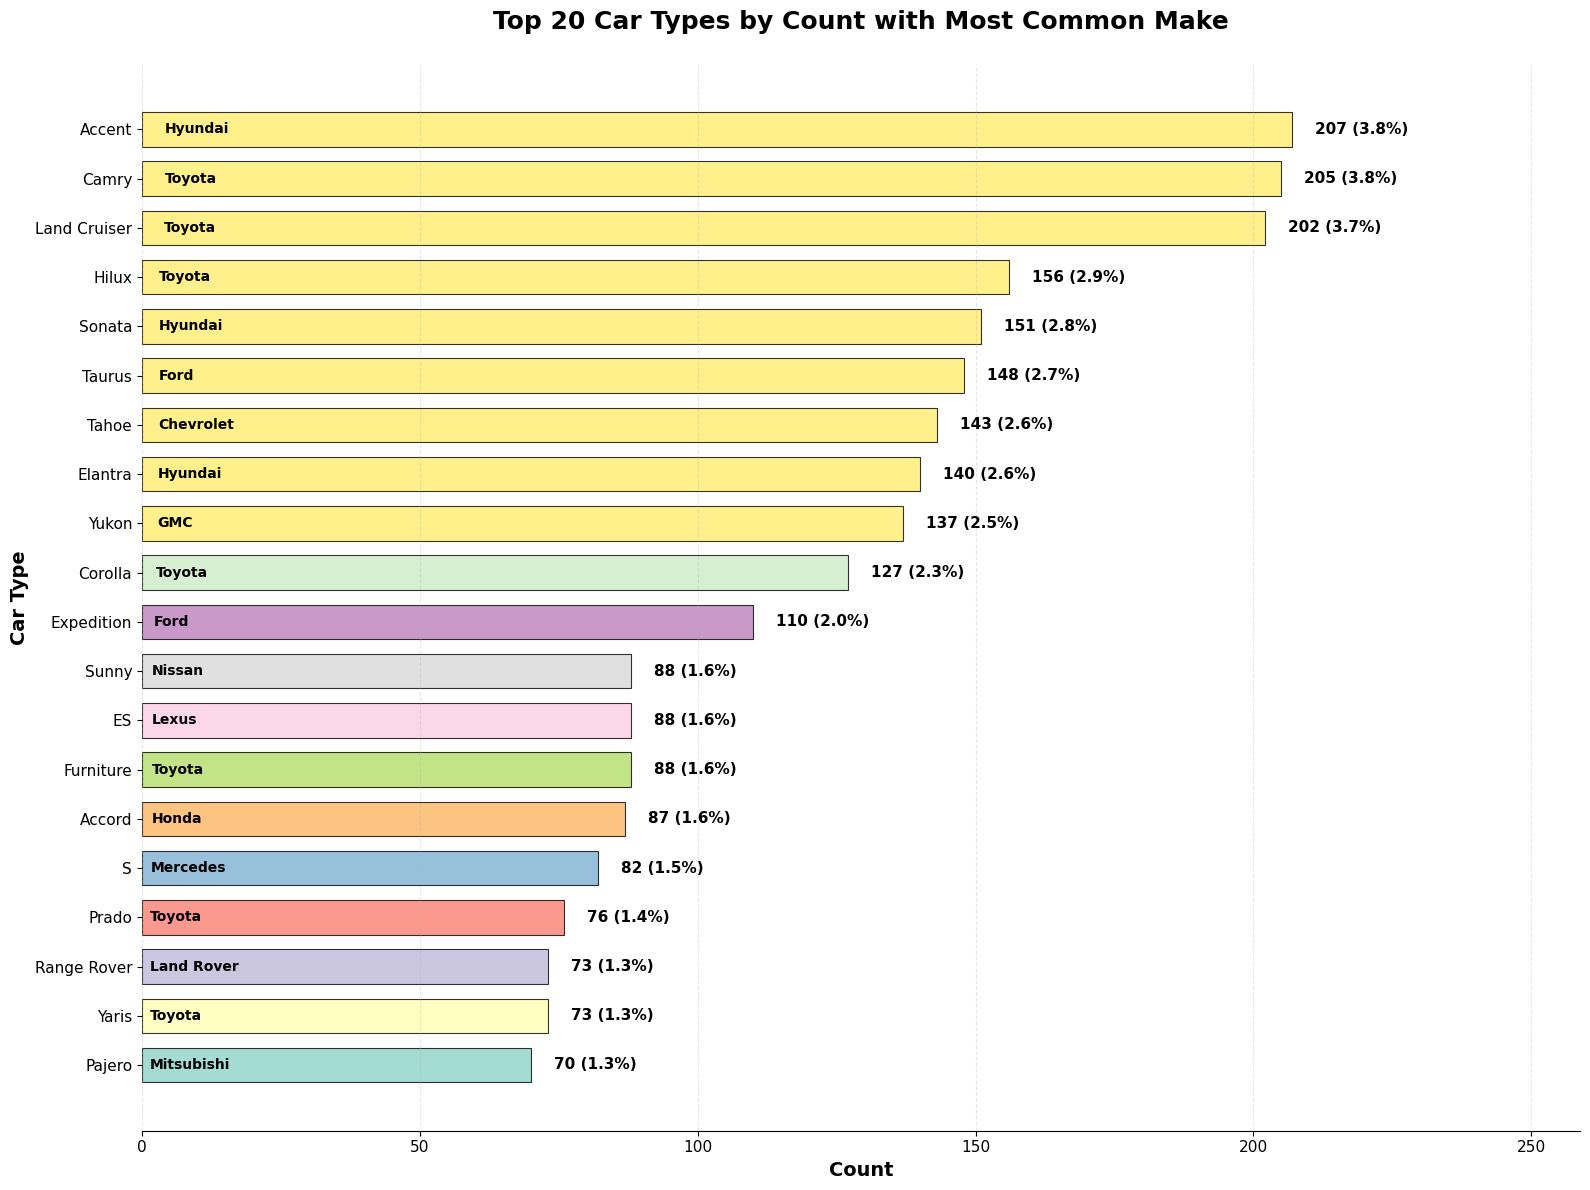

In [29]:
# Get value counts for Type
type_counts = df['Type'].value_counts().head(20)

# Get the most common Make for each Type - ADDED THIS SECTION
type_make_summary = {}
for car_type in type_counts.index:
    # Filter data for this car type
    type_data = df[df['Type'] == car_type]
    
    # Get the most common Make for this type
    top_make = type_data['Make'].value_counts().head(1)
    if len(top_make) > 0:
        top_make_name = top_make.index[0]
        top_make_count = top_make.values[0]
        make_percentage = (top_make_count / len(type_data)) * 100
        type_make_summary[car_type] = {
            'top_make': top_make_name,
            'make_count': top_make_count,
            'make_percentage': make_percentage
        }

# Horizontal bar chart version - Enhanced
plt.figure(figsize=(16, 12))

# Ensure data is sorted largest to smallest
type_counts_sorted = type_counts.sort_values(ascending=True)  # Sort for horizontal bar (largest at top)

# Create horizontal bar plot
bars = plt.barh(range(len(type_counts_sorted)), type_counts_sorted.values, 
                color=plt.cm.Set3(np.arange(len(type_counts_sorted))),
                alpha=0.8, edgecolor='black', linewidth=0.8, height=0.7)

# Customize the plot with larger text
plt.title('Top 20 Car Types by Count with Most Common Make', 
          fontsize=18, fontweight='bold', pad=25)
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Car Type', fontsize=14, fontweight='bold')
plt.yticks(range(len(type_counts_sorted)), type_counts_sorted.index, fontsize=11)
plt.xticks(fontsize=11)

# Add labels with count, percentage, and top make
total_cars = len(df)
max_count = max(type_counts_sorted.values)

for i, (car_type, count) in enumerate(type_counts_sorted.items()):
    percentage = (count / total_cars) * 100
    width = count
    
    if car_type in type_make_summary:
        make_info = type_make_summary[car_type]
        top_make = make_info['top_make']
        make_percentage = make_info['make_percentage']
        
        # Main label (count and percentage) - outside the bar
        plt.text(width + (max_count * 0.02), i,
                f'{count} ({percentage:.1f}%)', 
                ha='left', va='center', fontsize=11, fontweight='bold')
        
        # Make label inside the bar - BLACK TEXT as requested
        label_x = width * 0.02  # Position at the beginning of the bar
        plt.text(label_x, i, f'{top_make}', 
                ha='left', va='center', fontsize=10, fontweight='bold',
                color='black')  # Changed to black
        
    else:
        # Fallback if no make data
        plt.text(width + (max_count * 0.02), i,
                f'{count} ({percentage:.1f}%)', 
                ha='left', va='center', fontsize=11, fontweight='bold')

# Adjust xlim to accommodate labels
plt.xlim(0, max_count * 1.25)

# Add grid for better readability
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Remove spines for cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

### Findings

Accent dari pabrikan Hyundai menjadi tipe used car terbanyak yang dijual meskipun secara keseluruhan pabrikan, jumlah used car yang dijual lebih sedikit secara signifikan dari pabrikan Toyota dengan tipe dominan Camry, Land Cruiser, dan Hilux. Dari Top 20 tipe, 7 diantaranya dari pabrikan Toyota.

### Recommendation

Mobil99 diharapkan berfokus pada mobil-mobil diatas untuk menjual mobil bekas khususnya tipe-tipe dari
pabrikan Toyota seperti Camry, Land Cruiser, dan Hilux. Selain itu, Mobil bekas dari pabrikan Hyundai juga cukup
banyak di pasaran untuk tipe Accent, Sonata, dan Elantra yang bisa dipertimbangkan jika ingin menyediakan supply mobil
bekas dengan tipe tertentu. Hal ini dapat meningkatkan peluang mobil terjual secara cepat sehingga inventory tidak menumpuk dan cash-flow berjalan baik

In [33]:
# Calculate grand total for top 20 types
grand_total_count = type_counts.sum()
grand_total_percentage = (grand_total_count / total_cars) * 100

# Additional insights
print(f"\n" + "=" * 80)
print("INSIGHTS")
print("=" * 80)
print(f"• Total cars analyzed: {total_cars:,}")
print(f"• Grand Total of Top 20 Types: {grand_total_count:,} cars ({grand_total_percentage:.1f}% of all cars)")
print(f"• Remaining types (outside top 20): {total_cars - grand_total_count:,} cars ({(100 - grand_total_percentage):.1f}% of all cars)")


INSIGHTS
• Total cars analyzed: 5,411
• Grand Total of Top 20 Types: 2,451 cars (45.3% of all cars)
• Remaining types (outside top 20): 2,960 cars (54.7% of all cars)


<div class="alert alert-info">

Terlihat bahwa lebih dari 45% dari keseluruhan mobil bekas yang dijual pada platform diwakili oleh list Top 20 berdasarkan tipe. Oleh karena itu analisis lebih lanjut akan berfokus ke-20 tipe mobil bekas tersebut.

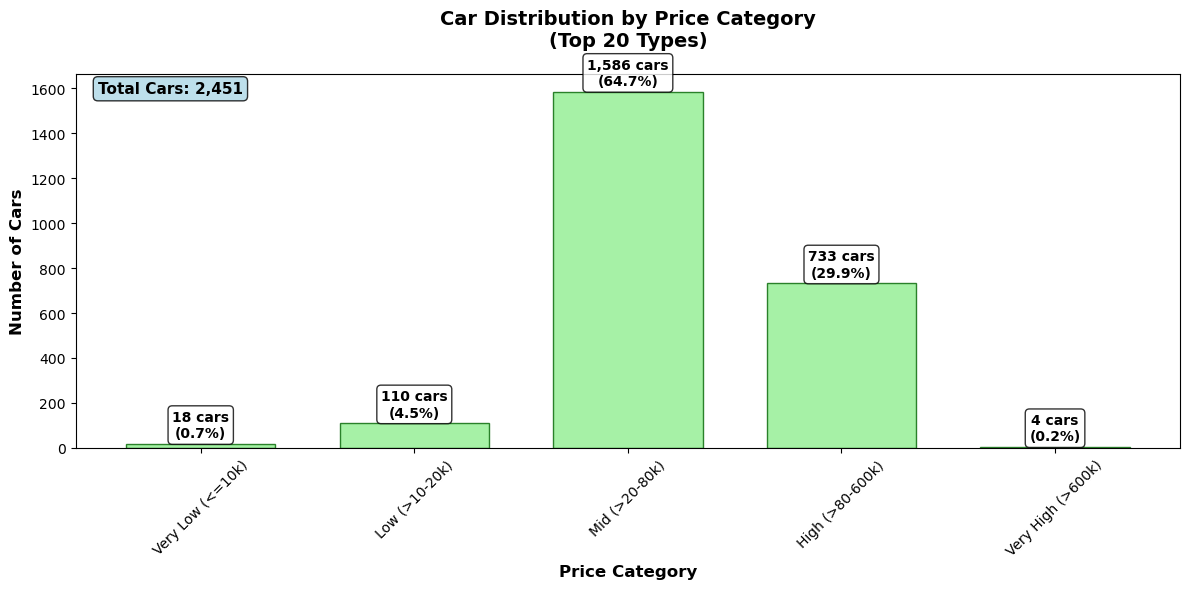

In [10]:
# Get top 20 types
top_20_types = type_counts.head(20).index

# Filter dataframe for top 20 types
df_top_20_categorized = df_categorized[df_categorized['Type'].isin(top_20_types)]

# Define the price order for consistent sorting
price_order = ['Very Low (<=10k)', 'Low (>10-20k)', 'Mid (>20-80k)', 'High (>80-600k)', 'Very High (>600k)']

# Create single plot for price category distribution
plt.figure(figsize=(12, 6))

# Get price distribution for Top 20 Types
price_counts = df_top_20_categorized['Price_Category'].value_counts().reindex(price_order)
price_percentages = (price_counts / len(df_top_20_categorized)) * 100

# Create bar plot
bars = plt.bar(price_counts.index, price_counts.values, color='lightgreen', 
               edgecolor='darkgreen', alpha=0.8, width=0.7)

plt.title('Car Distribution by Price Category\n(Top 20 Types)', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Number of Cars', fontsize=12, fontweight='bold')
plt.xlabel('Price Category', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

# Add detailed labels with count and percentage
for i, (count, percentage) in enumerate(zip(price_counts.values, price_percentages.values)):
    plt.text(i, count + max(price_counts.values)*0.01, 
             f'{count:,} cars\n({percentage:.1f}%)', 
             ha='center', va='bottom', fontweight='bold', fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Add total count annotation
total_cars = len(df_top_20_categorized)
plt.text(0.02, 0.98, f'Total Cars: {total_cars:,}', transform=plt.gca().transAxes,
         fontsize=11, fontweight='bold', verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))

plt.tight_layout()
plt.show()

### Findings

Mobil bekas di rentang mid price lebih banyak secara signifikaan dijual daripada kategori harga lainnya, menunjukkan kemungkinan konsumen di pasar mobil bekas cenderung memilih harga mobil yang tidak terlalu murah namun masih affordable.

### Recommendation

Mobil99 menyediakan lebih banyak mobil bekas dikisaran harga >20.000-80.000 riyal untuk memaksimalkan kunjungan konsumen yang mencari mobil bekas di kisaran harga tersebut untuk meningkatkan penjualan.

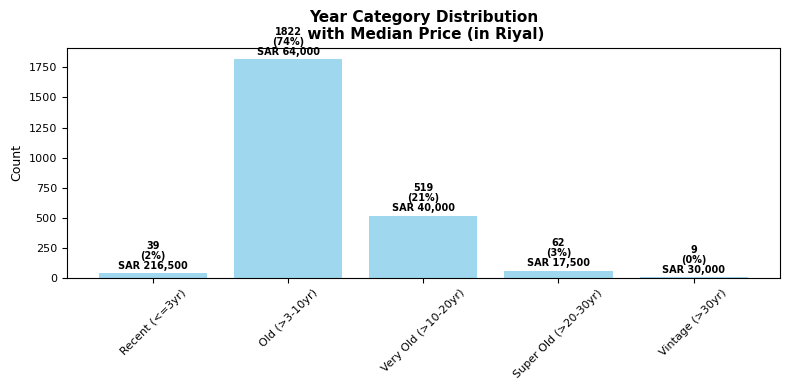

In [21]:
# Define the year order for consistent sorting
year_order = ['Recent (<=3yr)', 'Old (>3-10yr)', 'Very Old (>10-20yr)', 'Super Old (>20-30yr)', 'Vintage (>30yr)']

# Minimalist version with median prices
plt.figure(figsize=(8, 4))

year_counts = df_top_20_categorized['Year_Category'].value_counts().reindex(year_order)
year_percentages = (year_counts / len(df_top_20_categorized)) * 100
year_medians = df_top_20_categorized.groupby('Year_Category')['Price'].median().reindex(year_order)

bars = plt.bar(year_counts.index, year_counts.values, color='skyblue', alpha=0.8)
plt.title('Year Category Distribution\n with Median Price (in Riyal)', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=9)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)

for i, (count, percentage, median_price) in enumerate(zip(year_counts.values, year_percentages.values, year_medians.values)):
    plt.text(i, count + max(year_counts.values)*0.01, 
             f'{count}\n({percentage:.0f}%)\nSAR {median_price:,.0f}', 
             ha='center', va='bottom', fontweight='bold', fontsize=7,
             linespacing=1.0)

plt.tight_layout()
plt.show()

### Findings

Mobil bekas dengan rentang >3-10 tahun (old) paling banyak dijual dengan median price yang cukup tinggi sebesar 64.000 riyal. Hanya kalah dengan mobil bekas kategori Recent (<= 3 tahun).

### Recommendation

Penyediaan mobil bekas dapat lebih terfokus pada rentang umur mobil lebih dari 3 sampai 10 tahun dimana mobil bekas memiliki peluang lebih banyak terjual dengan harga jual yang cukup tinggi.

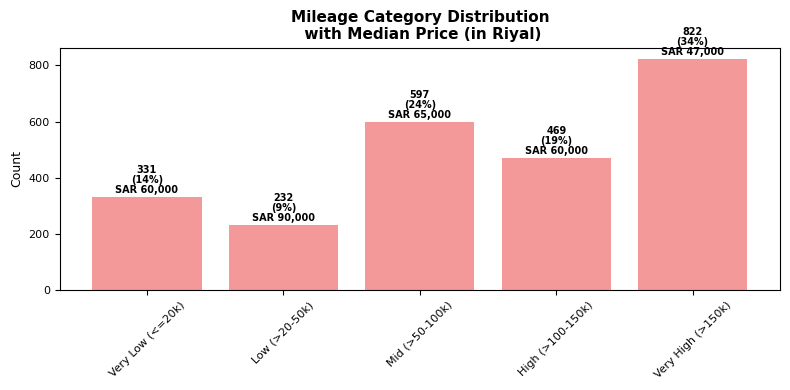

In [20]:
# Define the mileage order for consistent sorting
mileage_order = ['Very Low (<=20k)', 'Low (>20-50k)', 'Mid (>50-100k)', 'High (>100-150k)', 'Very High (>150k)']

# Minimalist version with median prices for Mileage
plt.figure(figsize=(8, 4))

mileage_counts = df_top_20_categorized['Mileage_Category'].value_counts().reindex(mileage_order)
mileage_percentages = (mileage_counts / len(df_top_20_categorized)) * 100
mileage_medians = df_top_20_categorized.groupby('Mileage_Category')['Price'].median().reindex(mileage_order)

bars = plt.bar(mileage_counts.index, mileage_counts.values, color='lightcoral', alpha=0.8)  # Changed color to lightcoral
plt.title('Mileage Category Distribution\n with Median Price (in Riyal)', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=9)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)

for i, (count, percentage, median_price) in enumerate(zip(mileage_counts.values, mileage_percentages.values, mileage_medians.values)):
    plt.text(i, count + max(mileage_counts.values)*0.01, 
             f'{count}\n({percentage:.0f}%)\nSAR {median_price:,.0f}', 
             ha='center', va='bottom', fontweight='bold', fontsize=7,
             linespacing=1.0)

plt.tight_layout()
plt.show()

### Findings

Mileage kategori sangat tinggi paling banyak dijual (34%), dimungkinkan karena harga yang paling affordable (47.000 riyal). Kategori mid tertinggi kedua paling banyak dijual (24%) dengan rata-rata harga yang juga di kategori mid price.

### Recommendation

Mobil99 perlu mempertimbangkan faktor harga mobil yang affordable serta jarak tempuh mobil bekas yang tidak terlalu tinggi yang bisa jadi pertimbangan konsumen untuk mendapatkan value terbaik dari mobil bekas sehingga penyediaan mobil dengan kategori tersebut dapat meningkatkan penjualan mobil bekas.

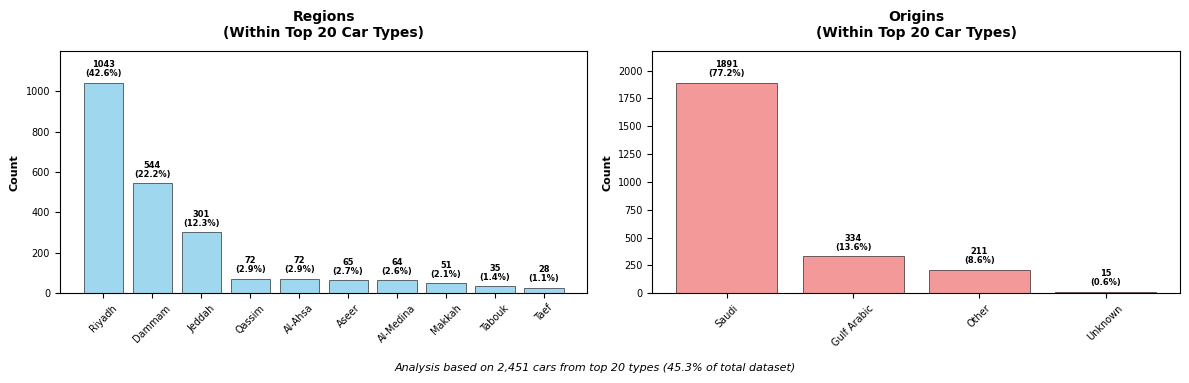

In [22]:
# Get top 20 types
top_20_types = type_counts.head(20).index

# Filter dataframe for top 20 types
df_top_20 = df[df['Type'].isin(top_20_types)]

# Enhanced version with better spacing and context
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Calculate percentages relative to top 20 types only
total_top_20 = len(df_top_20)

# Plot 1: Region Histogram
region_counts = df_top_20['Region'].value_counts().head(10)
bars1 = ax1.bar(region_counts.index, region_counts.values, 
                color='skyblue', alpha=0.8, edgecolor='black', linewidth=0.5)

ax1.set_title('Regions\n(Within Top 20 Car Types)', fontsize=10, fontweight='bold', pad=10)
ax1.set_ylabel('Count', fontsize=8, fontweight='bold')
ax1.tick_params(axis='x', rotation=45, labelsize=7)
ax1.tick_params(axis='y', labelsize=7)

ax1.set_ylim(0, max(region_counts.values) * 1.15)

for bar, count in zip(bars1, region_counts.values):
    height = bar.get_height()
    percentage = (count / total_top_20) * 100
    ax1.text(bar.get_x() + bar.get_width()/2., height + (max(region_counts.values) * 0.02),
             f'{count}\n({percentage:.1f}%)', ha='center', va='bottom', 
             fontsize=6, fontweight='bold', linespacing=1.0)

# Plot 2: Origin Histogram
origin_counts = df_top_20['Origin'].value_counts().head(10)
bars2 = ax2.bar(origin_counts.index, origin_counts.values, 
                color='lightcoral', alpha=0.8, edgecolor='black', linewidth=0.5)

ax2.set_title('Origins\n(Within Top 20 Car Types)', fontsize=10, fontweight='bold', pad=10)
ax2.set_ylabel('Count', fontsize=8, fontweight='bold')
ax2.tick_params(axis='x', rotation=45, labelsize=7)
ax2.tick_params(axis='y', labelsize=7)

ax2.set_ylim(0, max(origin_counts.values) * 1.15)

for bar, count in zip(bars2, origin_counts.values):
    height = bar.get_height()
    percentage = (count / total_top_20) * 100
    ax2.text(bar.get_x() + bar.get_width()/2., height + (max(origin_counts.values) * 0.02),
             f'{count}\n({percentage:.1f}%)', ha='center', va='bottom', 
             fontsize=6, fontweight='bold', linespacing=1.0)

# Add overall context
plt.figtext(0.5, 0.01, f"Analysis based on {total_top_20:,} cars from top 20 types ({total_top_20/len(df)*100:.1f}% of total dataset)", 
            ha='center', fontsize=8, style='italic')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Make space for the footer
plt.show()

### Findings

Lebih dari 77% Used car yang dijual berasal dari Saudi dan dijual kembali paling banyak di region Riyadh, Lalu diikuti di region Jeddah dan Dammam masing-masing dengan persentase 42.6%, 22.2%, dan 12.3%

### Recommendation

Penjualan mobil bekas diarahkan ke region Riyadh, Dammam, dan Jeddah dimana terlihat di pasar mobil bekas paling banyak dijual pada region tersebut. Lalu pembelian mobil bekas untuk dijual kembali disarankan dari Saudi karena pembelian dari negara lain berisiko menaikkan harga jual kembali karena adanya potensi kenaikan pada biaya transportasi
 

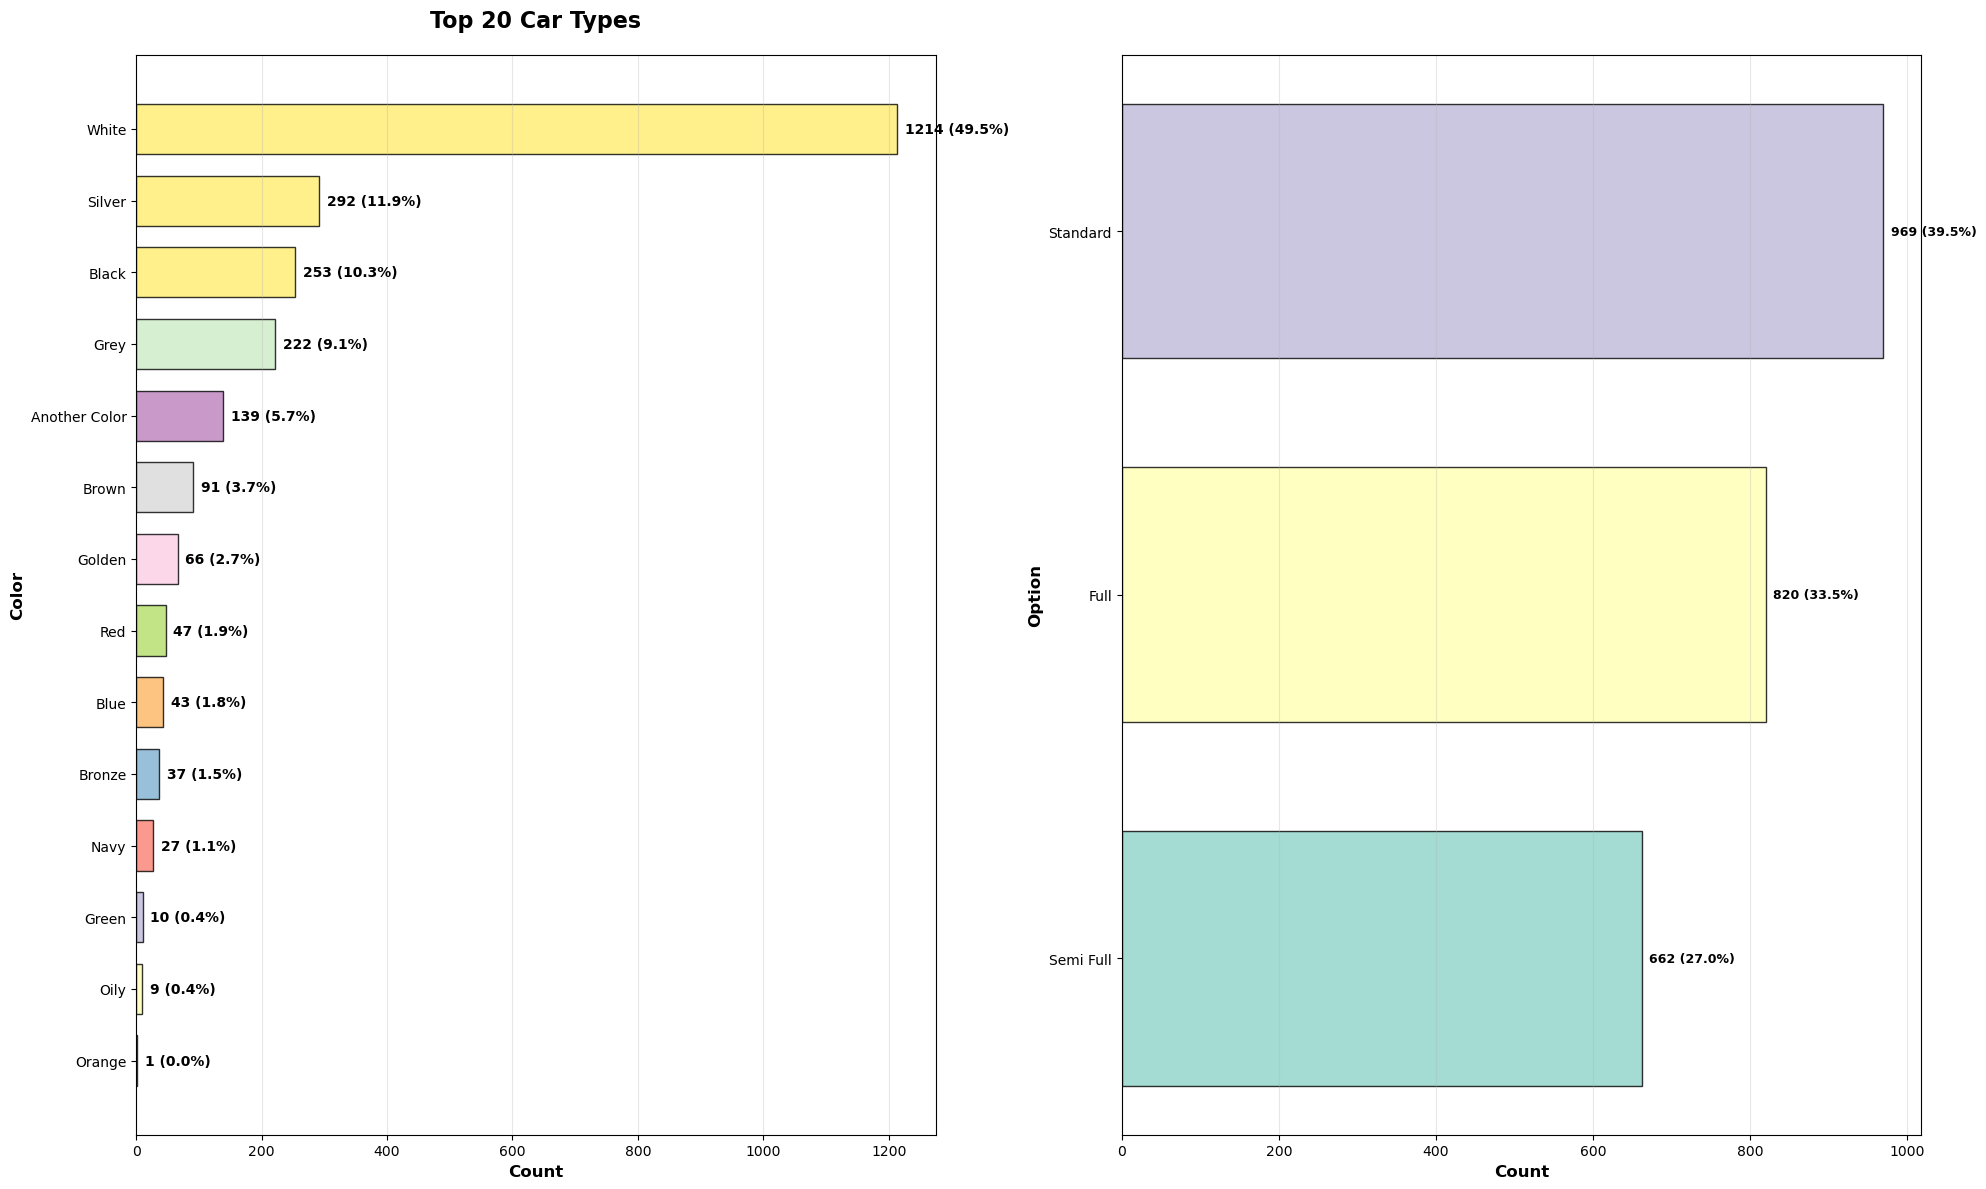

In [23]:
from collections import Counter 

# Horizontal bar chart version
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

# Plot 1: Top Colors (Horizontal)
top_colors = df_top_20['Color'].value_counts().head(15).sort_values(ascending=True)
colors = plt.cm.Set3(np.arange(len(top_colors)))
bars1 = ax1.barh(range(len(top_colors)), top_colors.values, color=colors, alpha=0.8, edgecolor='black', height=0.7)

ax1.set_title('Top 20 Car Types', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Count', fontsize=12, fontweight='bold')
ax1.set_ylabel('Color', fontsize=12, fontweight='bold')
ax1.set_yticks(range(len(top_colors)))
ax1.set_yticklabels(top_colors.index)

# Add count labels
for i, (bar, count) in enumerate(zip(bars1, top_colors.values)):
    percentage = (count / total_cars) * 100
    ax1.text(bar.get_width() + (max(top_colors.values) * 0.01), i,
             f'{count} ({percentage:.1f}%)', ha='left', va='center', fontsize=10, fontweight='bold')

ax1.grid(axis='x', alpha=0.3)

# Plot 2: Top Options (Horizontal)
try:
    all_options = []
    for options_str in df_top_20['Options'].dropna():
        if ',' in str(options_str):
            all_options.extend([opt.strip() for opt in str(options_str).split(',')])
        elif str(options_str).strip():
            all_options.append(str(options_str).strip())
    
    option_counts = Counter(all_options)
    top_options_series = pd.Series(option_counts).nlargest(15).sort_values(ascending=True)
    
    colors = plt.cm.Set3(np.arange(len(top_options_series)))
    bars2 = ax2.barh(range(len(top_options_series)), top_options_series.values, 
                     color=colors, alpha=0.8, edgecolor='black', height=0.7)
    
    ax2.set_xlabel('Count', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Option', fontsize=12, fontweight='bold')
    ax2.set_yticks(range(len(top_options_series)))
    ax2.set_yticklabels(top_options_series.index)
    
    # Add count labels
    total_options = sum(top_options_series.values)
    for i, (bar, count) in enumerate(zip(bars2, top_options_series.values)):
        percentage = (count / total_options) * 100
        ax2.text(bar.get_width() + (max(top_options_series.values) * 0.01), i,
                 f'{count} ({percentage:.1f}%)', ha='left', va='center', fontsize=9, fontweight='bold')
    
    ax2.grid(axis='x', alpha=0.3)
    
except Exception as e:
    ax2.text(0.5, 0.5, f'Cannot extract options:\n{e}', 
             ha='center', va='center', transform=ax2.transAxes, fontsize=12)
    ax2.set_title('Top Options (Data Unavailable)', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

### Findings

Karakteristik mobil bekas berwarna putih secara signifikan (49.5%) menjadi yang paling banyak dijual daripada warna lain. Selain itu, mobil bekas dengan fitur standar juga yang terbanyak dijual dengan persentase sebesar 39.5% dari jumlah top 20 tipe mobil bekas.

### Recommendation

Pemilihan karakteristik mobil berwarna putih dan  mobil berfitur standar untuk dijual kembali untuk meningkatkan peluang mobil bekas dapat lebih banyak terjual.

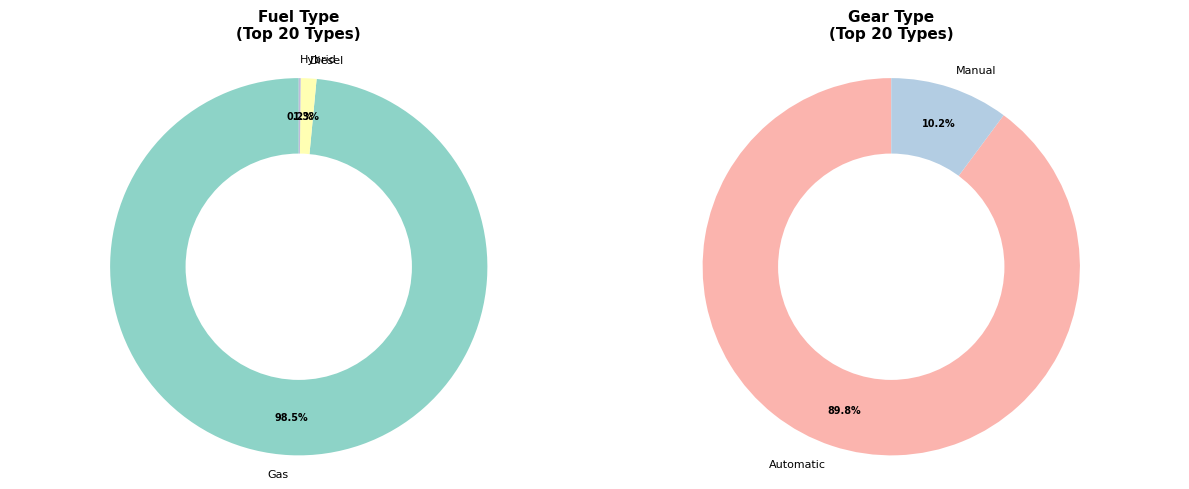

In [24]:
# Create compact side-by-side doughnut charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Fuel_Type Doughnut Chart
fuel_type_counts = df_top_20['Fuel_Type'].value_counts()
colors1 = plt.cm.Set3(np.arange(len(fuel_type_counts)))

wedges1, texts1, autotexts1 = ax1.pie(fuel_type_counts.values, 
                                      labels=fuel_type_counts.index,
                                      autopct='%1.1f%%',
                                      startangle=90,
                                      colors=colors1,
                                      pctdistance=0.80,
                                      textprops={'fontsize': 8})

# Draw doughnut center
centre_circle1 = plt.Circle((0,0), 0.60, fc='white')
ax1.add_artist(centre_circle1)

# Enhance labels
for autotext in autotexts1:
    autotext.set_fontsize(7)
    autotext.set_fontweight('bold')

ax1.set_title('Fuel Type\n(Top 20 Types)', fontsize=11, fontweight='bold', pad=15)

# Plot 2: Gear_Type Doughnut Chart
gear_type_counts = df_top_20['Gear_Type'].value_counts()
colors2 = plt.cm.Pastel1(np.arange(len(gear_type_counts)))

wedges2, texts2, autotexts2 = ax2.pie(gear_type_counts.values, 
                                      labels=gear_type_counts.index,
                                      autopct='%1.1f%%',
                                      startangle=90,
                                      colors=colors2,
                                      pctdistance=0.80,
                                      textprops={'fontsize': 8})

# Draw doughnut center
centre_circle2 = plt.Circle((0,0), 0.60, fc='white')
ax2.add_artist(centre_circle2)

# Enhance labels
for autotext in autotexts2:
    autotext.set_fontsize(7)
    autotext.set_fontweight('bold')

ax2.set_title('Gear Type\n(Top 20 Types)', fontsize=11, fontweight='bold', pad=15)

# Equal aspect ratio
ax1.axis('equal')
ax2.axis('equal')

plt.tight_layout()
plt.show()

### Findings

Mobil bekas dengan tipe bahan bakar Gas (bensin) menjadi yang paling banyak dijual dengan persentase 98.5% . Selain itu, Tipe transmisi Automatic juga menjadi terbanyak dijual yaitu sebesar 89.8%.

### Recommendation

Pemilihan tipe mobil diatas lebih diutamakan untuk dijual kembali untuk meningkatkan peluang mobil bekas dapat lebih banyak terjual.